### Setup

In [1]:
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

In [2]:
config_file = 'configs/heron/grid_search_segformer/segformer_mit-b5_dice_OHEM_640x640_cracks_and_potholes.py'
checkpoint_file = 'work_dirs/segformer_mit-b5_dice_OHEM_640x640_cracks_and_potholes/latest.pth'

In [2]:
config_file = 'configs/heron/unet_s5_d16_640x640_lane.py'
checkpoint_file = 'work_dirs/unet_s5_d16_640x640_lane/latest.pth'

In [17]:
config_file = 'configs/heron/segformer_mit-b0_dice_OHEM_pothole600.py'
checkpoint_file = 'work_dirs/segformer_mit-b0_dice_OHEM_pothole600_100epochs/latest.pth'

In [3]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

/mnt/storage/Projects/heron/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: work_dirs/unet_s5_d16_640x640_lane/latest.pth


In [4]:
from pathlib import Path
# test = Path('/home/innovation/Projects/heron/mmsegmentation/pothole600/testing/rgb/')
test = Path('/home/innovation/Projects/heron/mmsegmentation/United_States/train/images')

In [4]:
from pathlib import Path
# test = Path('/home/innovation/Projects/heron/mmsegmentation/pothole600/testing/rgb/')
test = Path('/home/innovation/Projects/heron/mmsegmentation/lane/test')

In [20]:
from pathlib import Path
test = Path('/home/innovation/Projects/heron/mmsegmentation/pothole600/test_from_web/')

In [5]:
pallete = [[127,127,127], [255, 70, 0], [255, 240, 0]]

In [5]:
pallete = [[127,127,127], [255, 70, 0]]

### Test a single image

#### RAW

In [47]:

img = test/'dam01_RAW.png'
result = inference_segmentor(model, img)

####  or cropped image

In [13]:
# test a single CROPPED image
import numpy as np
img_list = os.listdir(test)
img = test/img_list[5]

# Importing Image class from PIL module
from PIL import Image

im = Image.open(img)
width, height = im.size

left = 0
top = 0
right = 640 if width>640 else width
bottom = 640 if height>640 else height
 
im1 = np.array(im.crop((left, top, right, bottom)))

im1[:2]
result = inference_segmentor(model, im1[:,:,:3])

#TODO needs RGB conversion

#### show the results

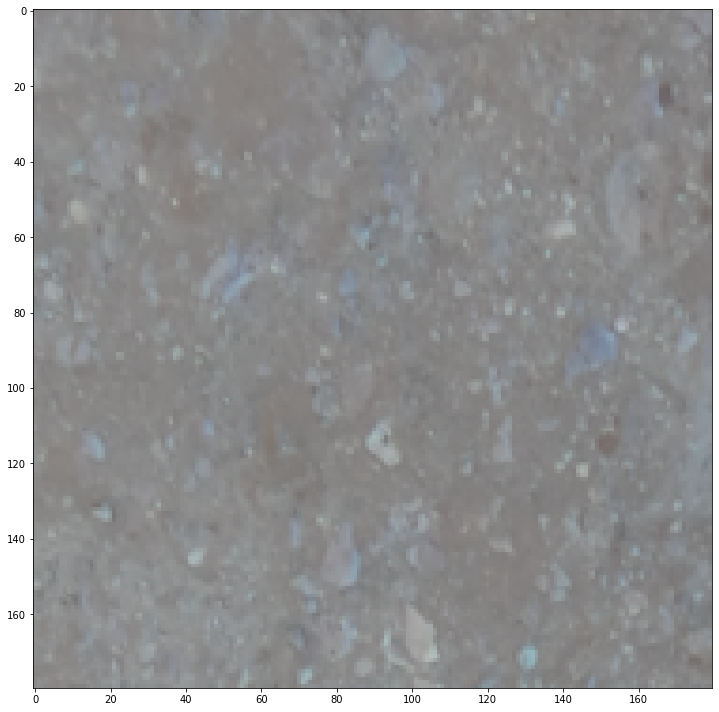

In [14]:
show_result_pyplot(model, im1[:,:,:3], result, pallete)

### Test multiple images

In [6]:
import os
results = []
images = os.listdir(test)
for img in images[:50]:  
    img_path = test/img
    results.append(inference_segmentor(model, img_path))

#### show the results

/mnt/storage/Projects/heron/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


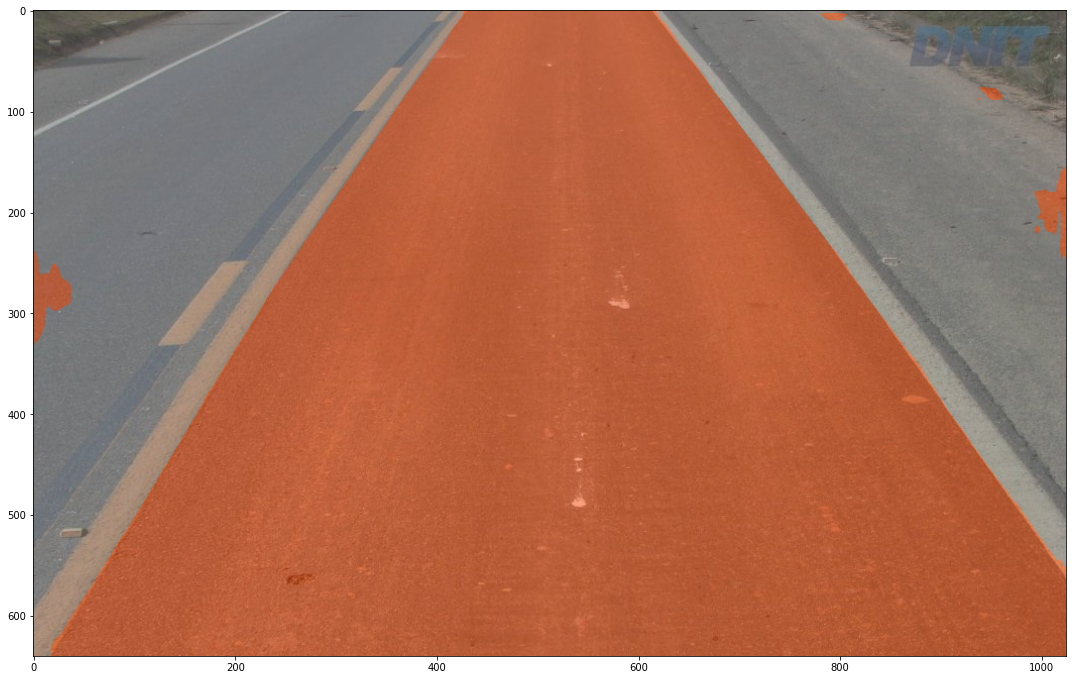

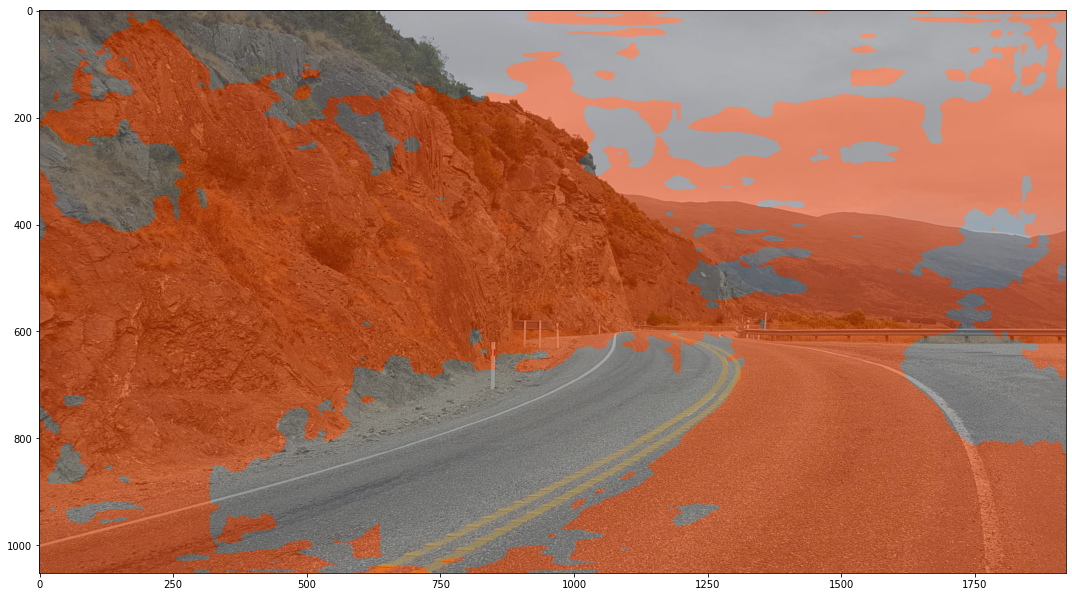

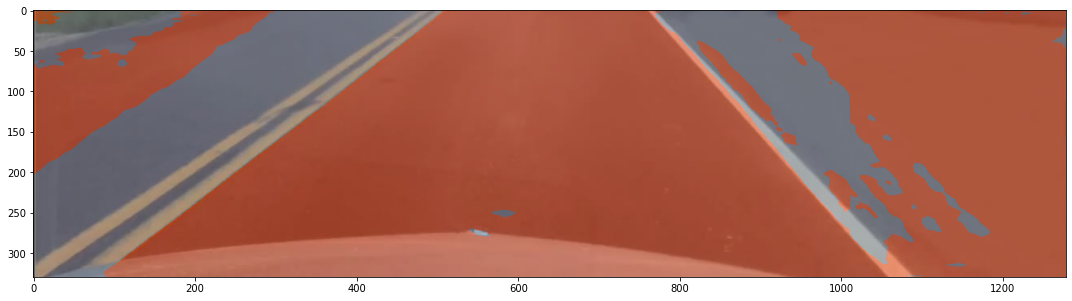

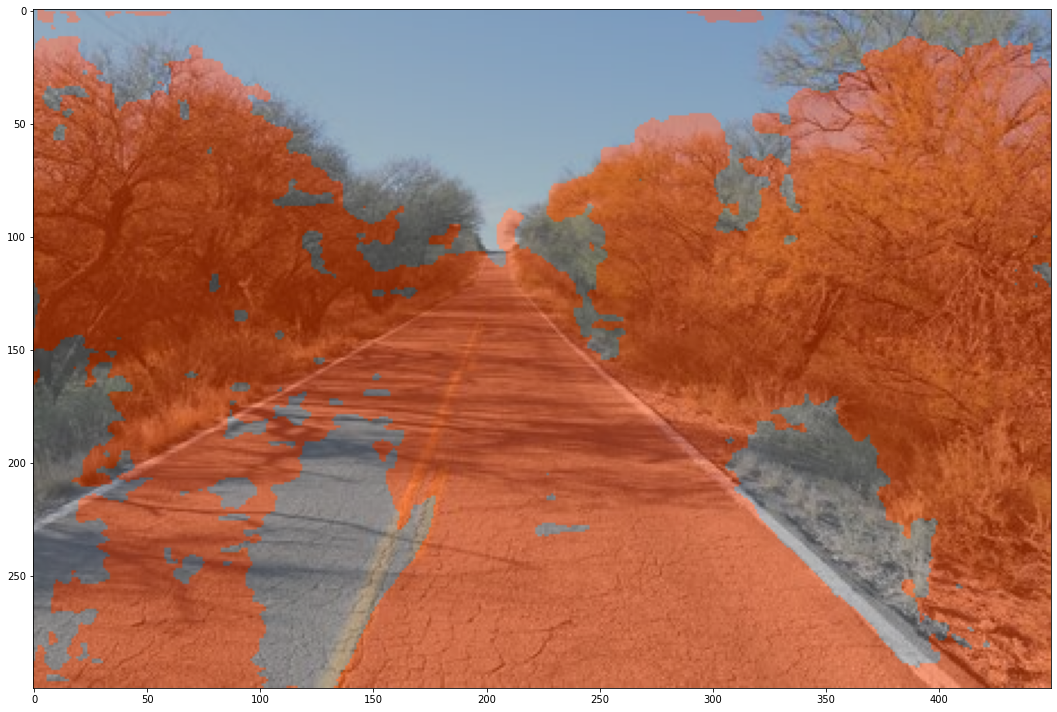

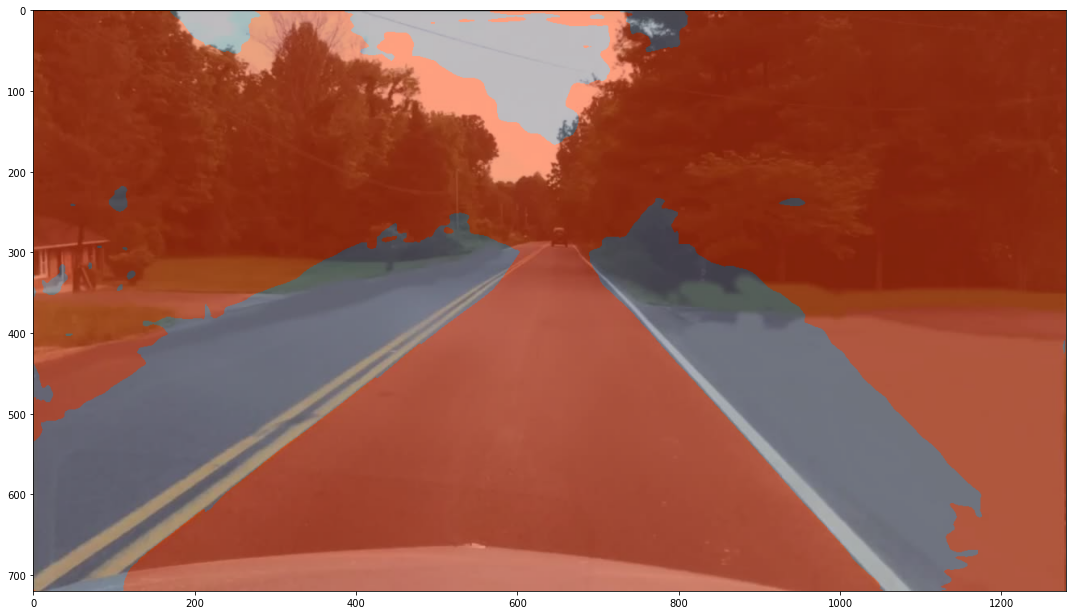

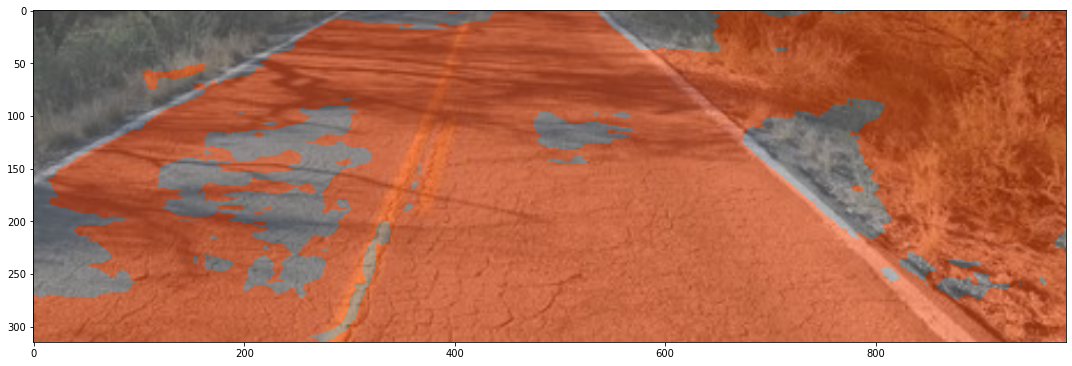

In [7]:
for r, i in zip(results, images):
    show_result_pyplot(model, test/i, r, pallete)